In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re

!pip install transformers
from transformers import pipeline
summarizer = pipeline("summarization")

     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 2.9MB 34.4MB/s 
     |████████████████████████████████| 890kB 40.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=3ed924fbbb8c2372b1de30a91092769c92d6337f4237d1cf3063b687a8bd46e4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [123]:
df = pd.read_csv("hindi_sad1.csv", engine = 'python')
#df = df.drop('sentence',axis=1)
#df['text']=df.index
df.head(20)

,sentence
0,muajizviews i take such photos a lot like natu...
1,koi chandey donation do bhai inko yeh pareshaa...
2,nai aleeha seriously maybe there are some frie...
3,pareshaan mishti was the boldest and you do no...
4,ally bas dhoka deta hai sabko he will get him ...
5,exactlyrags ke time par ridz dhoka kaise diya ...
6,still have hope on dr faisal sultan shafqat sb...
7,snapchat filter addiction is toxic i hate to s...
8,fake pic aur guys ye boy hay jis ki pic upload...
9,riansh ishqmeinmarjawan2 tumhe kisi ladki ne b...


In [5]:
#df.head(50)
#df.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
34738    0
34739    0
34740    0
34741    0
34742    0
Length: 34743, dtype: int64

In [124]:
len(df)

554

In [125]:
text = np.array(df['sentence'])
sentences = []
for post in text:
    # Splitting by '\n' to separate the paragraphs from each other
    sentences = sentences + post.split('\n')
len(sentences)

554

In [126]:
sentences = [i for i in sentences if len(i.split()) > 3]

In [127]:
len(sentences)

554

In [128]:
sentence_len = [len(i.split()) for i in sentences]
max(sentence_len)

28

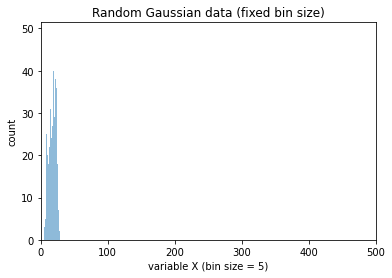

In [129]:
# fixed bin size
bins = np.arange(0, 500) # fixed bin size

plt.xlim([min(sentence_len)-5, 500])
plt.hist(sentence_len, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [130]:
new_sentences = []
for line in sentences:
    if len(line.split()) <= 75:
        new_sentences.append(line)
    else:
        new_lines = line.split('.')
        # Splitting and adding all new formed sentences to the new_sentence array
        new_sentences = new_sentences + new_lines

In [131]:
sentence_len = [len(i.split()) for i in new_sentences]
max(sentence_len)

28

In [132]:
sentences = new_sentences[:]

for i in range(len(sentences) - 1):
    # We will add two consecutive sentences if both of them have less than 20 words
    if len(sentences[i].split()) < 20 and len(sentences[i+1].split()) < 20:
        sentences[i] = sentences[i] + '.' + sentences[i+1]

In [133]:
len(sentences)

554

In [134]:
sentences = list(set(sentences))

In [96]:
!pip install contractions
import contractions
import re

In [135]:
for i in range(len(sentences)):
    sentence = sentences[i]

    # Fixing the short forms of words
    sentence = contractions.fix(sentence).lower()

    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Splitting the sentence and joining again to remove extra white spaces
    words = sentence.split()
    sentence = ' '.join(words)

    sentences[i] = sentence

In [136]:
sentence_len = [len(i.split()) for i in sentences]
max(sentence_len)

37

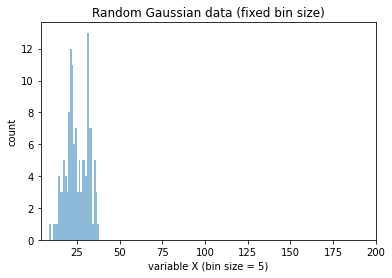

In [118]:
# fixed bin size
bins = np.arange(0, 200) # fixed bin size

plt.xlim([min(sentence_len)-5, 200])

plt.hist(sentence_len, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [137]:
for i in range(len(sentences)):
    sentence = sentences[i]
    if len(sentence.split()) > 150:
        summary_list = summarizer(sentence, max_length = 150, min_length = 30, do_sample = False)
        sentence = summary_list[0]['summary_text']
        sentences[i] = sentence

sentence_len = [len(i.split()) for i in sentences]
max(sentence_len)

In [138]:
len(sentences)

549

In [139]:
adict = {'sentence': sentences}
df = pd.DataFrame(adict)
df.to_csv('preprocessed_hindi_sadd.csv', index = False)

In [140]:
from google.colab import files
files.download('preprocessed_hindi_sadd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>